# Álgebra Linear

**Entrega: Representação e Manipulação de Dados**  
Formato: Código + Relatório com prints + Explicação Matemática

Nesta entrega vamos representar informações reais (pedidos da Cannoli) em forma matricial e aplicar conceitos de Álgebra Linear, como soma, média, multiplicação matricial, resolução de sistemas lineares e correlações vetoriais.  
O objetivo é entender como ferramentas matemáticas ajudam a extrair **insights de negócio** a partir de dados.

In [7]:
import numpy as np
import pandas as pd
from IPython.display import display


print("OK: NumPy e Pandas carregados.")


OK: NumPy e Pandas carregados.


In [4]:

df = pd.read_csv('https://raw.githubusercontent.com/2025-2-NCC5/Projeto2/main/cannoli.csv')

print("Linhas, Colunas:", df.shape)
display(df.head(10))


Linhas, Colunas: (60, 14)


,id,name,taxid,gender,dateofbirth,status,externalcode,isenriched,enrichedat,enrichedbt,createdat,createdby,updatedat,updatedby
0,2b46d0cf-c18a-43f3-98e5-db9fa61b5303,Fernanda,NaN,NaN,1989-12-26,1,NaN,NaN,NaN,NaN,2025-08-22 13:01:14.299+00,Support,2025-08-22 13:01:14.3+00,Support
1,92f6dfd4-06f2-4b82-b281-508f17de200d,Diogo,0.0,O,2002-10-11,1,74ec1a5f-7546-4d38-92bc-9d2d39b962c0,NaN,NaN,NaN,2025-07-03 22:19:02.029+00,Admin,2025-08-08 16:51:03.225+00,HorusBI App
2,97685b51-39fd-48c2-9f2e-79a3ee6f931c,Karina,100.0,NaN,1988-08-16,1,6b509f6c-8f2e-42ab-a8b0-f1f1f28ab460,NaN,NaN,NaN,2025-07-24 19:02:05.38+00,System,2025-08-08 16:52:09.694+00,HorusBI App
3,48c3a60c-b6ba-4fb5-94d4-0eb512bb30bc,Margaret,200.0,O,1997-08-25,1,3d2cd5af-e179-44d2-85f9-2697514660b0,NaN,NaN,NaN,2025-07-03 22:19:01.238+00,Admin,2025-08-08 16:51:01.568+00,HorusBI App
4,7b204554-2fb6-4878-a4f5-7b30f265b91e,Iasmin,NaN,N,1998-04-08,1,NaN,NaN,NaN,NaN,2025-08-15 15:42:04.972+00,Admin,2025-08-15 15:42:04.972+00,Admin
5,7j644784-2fb6-4878-a4f5-7bsfas43491e,Carolina,300.0,O,NaN,1,56ead7e0-1f09-4e87-8da5-3bb1bde70d60,NaN,NaN,NaN,2025-07-03 22:19:01.588+00,Admin,2025-08-08 16:51:02.41+00,HorusBI App
6,0f2057f8-8cb6-4b90-add8-8f671f9e88db,Matheus,400.0,O,10/1/2000,1,9d6c68bf-afe3-4d16-88ca-e498e61ecba0,NaN,NaN,NaN,2025-07-03 22:18:59.191+00,Admin,2025-08-08 16:51:40.531+00,HorusBI App
7,f31b38a7-a62d-445a-9b60-3bd7201134e1,Thiago,500.0,O,NaN,1,24d3b4ee-922f-4a6e-a65c-63226b38a570,NaN,NaN,NaN,2025-07-03 22:18:57.379+00,Admin,2025-08-08 16:51:36.664+00,HorusBI App
8,b20f3879-c008-48ef-8652-37735503b7cc,Cristiane,600.0,O,5/8/1974,1,563ea03e-fc55-4335-8b14-1a7a7c03c5a0,NaN,NaN,NaN,2025-07-04 22:31:19.701+00,Admin,2025-08-08 16:51:38.339+00,HorusBI App
9,deabfad6-a3c0-47ef-a10a-15653f1d3457,Helena,700.0,O,NaN,1,69e75f6b-e31a-4ce5-9821-865908274d40,NaN,NaN,NaN,2025-07-03 22:18:58.274+00,Admin,2025-08-08 16:51:38.822+00,HorusBI App


## 1) Vetores e Matriz de Features
Definições matemáticas:

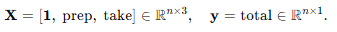

Assim, cada pedido vira uma linha da matriz, e podemos aplicar Álgebra Linear para analisar padrões.

In [20]:
df_cleaned = df.dropna(subset=['taxid', 'status']).copy()

df_cleaned['taxid'] = pd.to_numeric(df_cleaned['taxid'], errors='coerce')

df_cleaned['status'] = pd.to_numeric(df_cleaned['status'], errors='coerce')

df_cleaned.dropna(subset=['taxid', 'status'], inplace=True)

n = df_cleaned.shape[0]
y = df_cleaned["taxid"].to_numpy().reshape(-1, 1)
v_status = df_cleaned["status"].to_numpy().reshape(-1, 1)

X = np.hstack([np.ones((n, 1)), v_status])

print("Novo X shape:", X.shape),
print("Novo y shape:", y.shape)
print("Novo X^T shape:", X.T.shape)


Novo X shape: (58, 2)
Novo y shape: (58, 1)
Novo X^T shape: (2, 58)


## 2) Operações Básicas: Soma & Média
Essas operações básicas mostram como podemos obter métricas de negócio diretamente de vetores:  
- Soma → faturamento total ou tempo acumulado.  
- Média → ticket médio ou tempo médio de preparo.

In [14]:
soma_taxid = float(np.sum(y))
media_taxid = float(np.mean(y))
soma_status = float(np.sum(v_status))
media_status = float(np.mean(v_status))

print(f"Soma taxid: {soma_taxid:.2f}")
print(f"Média taxid: {media_taxid:.2f}")
print(f"Soma status: {soma_status:.2f}")
print(f"Média status: {media_status:.2f}")

Soma taxid: 28433.00
Média taxid: 490.22
Soma status: 31.00
Média status: 0.53


## 3) Multiplicação Matricial (Agregação por Categoria)

Cada linha representa um pedido e cada coluna uma categoria.  
Assim, \( R^\top y \) soma automaticamente o valor total (`y`) por categoria.

 Isso equivale a calcular o faturamento por canal ou por tipo de pedido usando apenas Álgebra Linear.

In [16]:
y = df_cleaned["taxid"].to_numpy().reshape(-1, 1)

cats = df_cleaned["gender"].astype(str).unique()
r = len(cats)
R = np.zeros((df_cleaned.shape[0], r))
for i, c in enumerate(df_cleaned["gender"].astype(str)):
    j = np.where(cats == c)[0][0]
    R[i, j] = 1

vendas_por_genero = (R.T @ y).flatten()
agg_gender = pd.DataFrame({"gender": cats, "totalAmount_sum": np.round(vendas_por_genero, 2)}).sort_values("totalAmount_sum", ascending=False)
display(agg_gender)


,gender,totalAmount_sum
0,O,9275.0
4,N,7838.0
3,F,5916.0
2,M,5304.0
1,nan,100.0


## 4) Regressão Linear com Método de Gauss

Nesta etapa, representamos os dados como matriz
𝑋
 e vetor
𝑦
 para resolver um sistema linear e estimar os coeficientes
𝛽
, que mostram como prep e take influenciam o valor do pedido.

Utilizamos a eliminação de Gauss e validamos o resultado com numpy.linalg.lstsq. Assim, transformamos dados brutos em parâmetros úteis para análise e tomada de decisão.

In [36]:
XtX = X.T @ X
Xty = X.T @ y

labels = [f"β{i}" for i in range(X.shape[1])]

try:
    beta_gauss = gauss_elimination(XtX, Xty, pivot=True)
    beta_gauss = beta_gauss.reshape(-1)  # garante vetor 1D
    show_betas(beta_gauss, labels=labels, title="Coeficientes via Método de Gauss")
except ValueError as e:
    print("Erro na eliminação de Gauss:", e)
    print("Tentando np.linalg.lstsq como alternativa robusta.")
    beta_gauss = None

beta_np, *_ = np.linalg.lstsq(X, y, rcond=None)
beta_np = beta_np.reshape(-1)  # garante vetor 1D
show_betas(beta_np, labels=labels, title="Validação via np.linalg.lstsq")

Coeficientes via Método de Gauss
--------------------------------
                  β0: 475.838710
Validação via np.linalg.lstsq
-----------------------------
                  β0: 475.838710


## 5) Centralização & Correlação (Cosseno do Ângulo)
A centralização garante que analisamos apenas a **variação em torno da média**.  
O cálculo do cosseno do ângulo mede a correlação entre duas variáveis:  

- Próximo de **1** → forte correlação positiva.  
- Próximo de **0** → sem correlação.  
- Próximo de **-1** → correlação negativa.


In [34]:
def centraliza(v):
    v = np.asarray(v).reshape(-1, 1)
    return v - np.mean(v) * np.ones_like(v)

def correlacao_cosseno(a, b):
    a = np.asarray(a).reshape(-1, 1)
    b = np.asarray(b).reshape(-1, 1)
    a_c = centraliza(a)
    b_c = centraliza(b)
    num = (a_c.T @ b_c).item()
    den = np.linalg.norm(a_c) * np.linalg.norm(b_c)
    return (num / den) if den != 0 else np.nan

def sinal_texto(c):
    if np.isnan(c): return "—"
    return "positiva (sobem juntas)" if c > 0 else ("negativa (uma sobe, outra desce)" if c < 0 else "nula")

def intensidade_texto(c):
    if np.isnan(c): return "indefinida"
    a = abs(c)
    if a < 0.2: return "muito fraca"
    elif a < 0.4: return "fraca"
    elif a < 0.6: return "moderada"
    elif a < 0.8: return "forte"
    else: return "muito forte"

def takeaway(par, c):
    if np.isnan(c):
        return f"{par}: não foi possível calcular."
    trend = "andam juntas" if c > 0 else ("andam em sentidos opostos." if c < 0 else "não têm tendência linear")
    strength = intensidade_texto(c)
    return f"{par}: relação {strength}, {trend} (cosseno = {c:+.4f})."

corr_status_taxid = correlacao_cosseno(df_cleaned['status'], df_cleaned['taxid'])

def resumo_simples(par, c):
    if np.isnan(c):
        return f"{par}: não foi possível calcular."
    trend = "andam juntas" if c > 0 else ("andam em sentidos opostos." if c < 0 else "não têm tendência linear")
    return f"{par}: cosseno = {c:+.4f}, {trend}"

print(resumo_simples("status ↔ taxid", corr_status_taxid))

status ↔ taxid: cosseno = -0.0490, andam em sentidos opostos.


## 6) Projeção Vetorial
A projeção mostra quanto de um vetor pode ser explicado por outro.  


In [35]:
def centraliza(v):
    v = np.asarray(v).reshape(-1, 1)
    return v - np.mean(v) * np.ones_like(v)

vs = centraliza(df_cleaned['status'])
vtid = centraliza(df_cleaned['taxid'])


num = (vtid.T @ vs).item()
den = (vs.T @ vs).item()
alpha = num / den if den != 0 else np.nan

proj = alpha * vs
proj_norm = float(np.linalg.norm(proj))
vtid_norm = float(np.linalg.norm(vtid))
res = vtid - proj
res_norm = float(np.linalg.norm(res))
explained_ratio = (proj_norm / vtid_norm) if vtid_norm != 0 else np.nan

print("\nProjeção de 'taxid' em 'status':\n")
print(f"α (escala da projeção)      : {alpha:,.6f}")
print(f"||projeção||                : {proj_norm:,.6f}")
print(f"||resíduo||                 : {res_norm:,.6f}")
print(f"||taxid||                   : {vtid_norm:,.6f}")
print(f"Parte explicada              : {explained_ratio*100:,.2f}%")

intensidade = ("baixa" if explained_ratio < 0.2 else
               "moderada" if explained_ratio < 0.6 else
               "alta") if not np.isnan(explained_ratio) else "indefinida"

print(f"\nResumo: Cerca de {explained_ratio*100:,.2f}% da variação de 'taxid' "
      f"está alinhada com 'status' (intensidade {intensidade}).")


Projeção de 'taxid' em 'status':

α (escala da projeção)      : -30.902031
||projeção||                : 117.391258
||resíduo||                 : 2,393.081565
||taxid||                   : 2,395.959116
Parte explicada              : 4.90%

Resumo: Cerca de 4.90% da variação de 'taxid' está alinhada com 'status' (intensidade baixa).
